# Analyzing the Social Network of OTT Actors : Identifying Key Players in the Streaming Industry


### Libraries Used:

In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import collections
import statistics
import time
import random

### Getting the dataset (.json)
Also, cleaning the dataset as some of the movies don't have the date mentioned.
So fetching the data only where date is available.

In [40]:
# Opening JSON file
f = open('./datasets/dataset.json')

data = json.load(f)
Movies = []
for i in data['movies']:
    if 'year' in i.keys():
        Movies.append(i)


f.close()

### Visualizing the dataset

Here you can see the year of movies which are present in the dataset and also the cast size of respective movies.

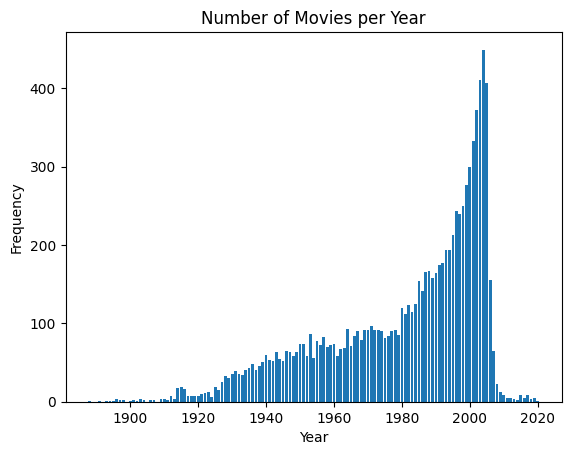

In [41]:
C = collections.Counter([d["year"] for d in Movies])
plt.xlabel("Year") 
plt.ylabel("Frequency")
plt.title("Number of Movies per Year") 
plt.bar(list(C.keys()), list(C.values()))
plt.show()

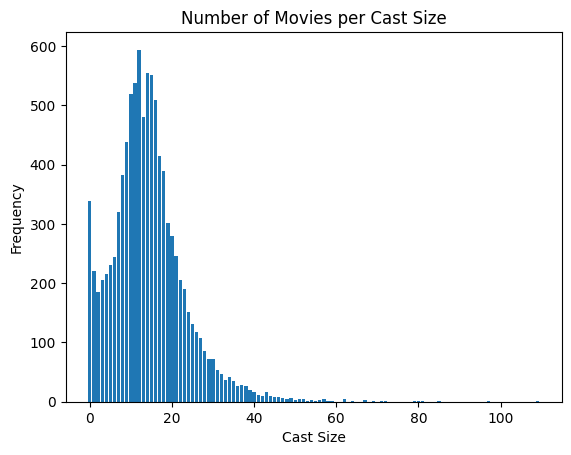

In [42]:
C = collections.Counter([len(d["cast"]) for d in Movies])
plt.xlabel("Cast Size") 
plt.ylabel("Frequency")
plt.title("Number of Movies per Cast Size") 
plt.bar(list(C.keys()), list(C.values()))
plt.show()

### Movies with the largest casts

In [44]:
Movies = sorted(Movies, key=lambda i: len(i["cast"]), reverse=True)
for i in range(5):
    print(Movies[i]["title"], "=", len(Movies[i]["cast"]))

The Longest Day (film) = 109
Esperanza (Philippine TV series) = 97
Amazon Women on the Moon = 85
Cimarron (1960 film) = 81
Guys and Balls = 80


## Forming a Network of Actors and Analyzing it

(We formed the network with the help of 'networkx' library of python)

In [46]:
#forming the social network for taken dataset
#using the networkx library of python

G = nx.MultiGraph()
for movie in Movies:
    for i in range(0, len(movie['cast'])):
        for j in range(i+1, len(movie['cast'])):
            G.add_edge(movie['cast'][i],movie['cast'][j],title=movie['title'])
            
print("Number of nodes in this Social Network : ",G.number_of_nodes())
print("Number of edges in this Social Network : ",G.number_of_edges())

Number of nodes in this Social Network :  65426
Number of edges in this Social Network :  1317837


### Actors with the most number of Movies

In [49]:
D = {}
for v in G.nodes():
    E = list(G.edges(v, data=True))
    S = set() 
    for e in E:
        S.add(e[2]["title"]) 
        D[v] = S
L = sorted(D.items(), key=lambda item: len(item[1]), reverse=True) 
for i in range(5):
    print(L[i][0], ":", len(L[i][1]))

[[Frank Welker]] : 74
[[Samuel L. Jackson]] : 60
[[Michael Caine]] : 52
[[Robert De Niro]] : 50
[[Christopher Walken]] : 49


### Actor Partnerships (and the number of Movies they've worked together in)

In [50]:
D = {}
for e in G.edges():
    D[e[0] + " and " + e[1]] = G.number_of_edges(e[0], e[1])
L = sorted(D.items(), key=lambda kv: kv[1], reverse=True) 
for i in range(5):
    print(L[i][0], ":", L[i][1])

[[Charles Chaplin]] and [[Edna Purviance]] : 26
[[Stan Laurel]] and [[Oliver Hardy]] : 20
[[Toshiro Mifune]] and [[Takashi Shimura]] : 18
[[Leo White]] and [[Edna Purviance]] : 16
[[Henry Bergman]] and [[Edna Purviance]] : 16


### Finding the shortest path between any two actors

In [54]:
P = nx.shortest_path(G, source="[[Oliver Hardy]]", target="[[Samuel L. Jackson]]")
print(P)

['[[Oliver Hardy]]', '[[Bessie Love]]', '[[Samuel L. Jackson]]']


In [58]:
def writePath(G, u, v):
    print("Here is the shortest path from", u, "to", v, ":") 
    if not u in G or not v in G:
        print(" Error:", u, "and/or", v, "are not in the network") 
        return
    try:
        P = nx.shortest_path(G, source=u, target=v)
        for i in range(len(P) - 1):
            t = G.edges[P[i],P[i+1]]["title"]
            print(" ", P[i], "was in", t, "with", P[i+1]) 
    except nx.NetworkXNoPath:
        print(" No path exists between", u, "and", v)
        
writePath(G, "[[Oliver Hardy]]", "[[Samuel L. Jackson]]")

Here is the shortest path from [[Oliver Hardy]] to [[Samuel L. Jackson]] :


ValueError: not enough values to unpack (expected 3, got 2)